## ASWATHI AJITH

### TASK - 1

### Investigate and analyze price data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression


In [2]:
n_gas_data = pd.read_csv("Downloads/Nat_Gas.csv")
n_gas_data.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


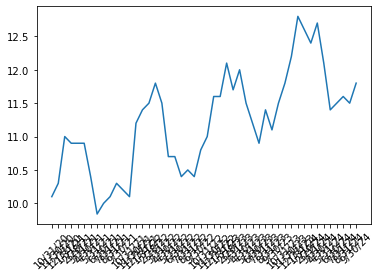

In [3]:
plt.plot(n_gas_data.Dates, n_gas_data.Prices)
plt.xticks(rotation=45)
plt.show()

 Gas prices are increasing over the years

To check with dates format

In [4]:
n_gas_data['Dates'] = pd.to_datetime(n_gas_data['Dates'])


To extract year and the months

In [5]:
n_gas_data['year'] = n_gas_data['Dates'].dt.year
n_gas_data['month'] = n_gas_data['Dates'].dt.month

To extract just one month's data 

In [6]:
n_gas_january = n_gas_data[n_gas_data['month']==1]
n_gas_january

,Dates,Prices,year,month
3,2021-01-31,10.9,2021,1
15,2022-01-31,11.5,2022,1
27,2023-01-31,12.1,2023,1
39,2024-01-31,12.6,2024,1


In [7]:
# When working with one month
x = np.array(n_gas_data[n_gas_data['month']==1]['year']).reshape(-1,1)
y = np.array(n_gas_data[n_gas_data['month']==1]['Prices'])

reg = LinearRegression()
reg.fit(x,y)


LinearRegression()

In [8]:
round(float(reg.predict([[2028]])), 2)

14.91

Now applying to all months

In [48]:
def predict_for_next_year(year):
    price_list = []
    for i in range(12):
        x1 = np.array(n_gas_data[n_gas_data['month']== i+1]['year']).reshape(-1,1)
        y1 = np.array(n_gas_data[n_gas_data['month']== i+1]['Prices'])
        reg1 = LinearRegression()
        reg1.fit(x1,y1)
        prediction = reg1.predict([[year]])
        price_list.append((round(float(prediction),2)))
    return(price_list)


In [49]:
# To get the month and the corresponding predicted prices for the year 2025

prices2025 = predict_for_next_year(2025)
prices2025

[13.2,
 12.8,
 13.25,
 12.65,
 12.08,
 11.95,
 12.25,
 11.9,
 12.45,
 12.85,
 13.46,
 13.66]

In [44]:
from datetime import datetime, timedelta
# To return a list of the last dates of each month in that year.
def get_the_last_mnths(year):
    date_list = []
    current_date = datetime(year, 12, 31)  # Start from the last day of the year, initialized to December 31st of the given year.
    
    while current_date.year == year:
        date_list.append(current_date.strftime('%Y-%m-%d'))
        year = current_date.year
        month = current_date.month

        current_date = current_date.replace(year=year, month = month, day = 1) # current_date is set to the first day of the same month.
        # Subtracts 1 day from the first day of the current month, effectively getting the last day of the previous month.
        current_date -= timedelta(days = 1)
    return date_list[::-1]   # Reverse list to be in chronological order, so that months appear from January to December.
dates_2025 = get_the_last_mnths(2025)
dates_2025


['2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31',
 '2025-06-30',
 '2025-07-31',
 '2025-08-31',
 '2025-09-30',
 '2025-10-31',
 '2025-11-30',
 '2025-12-31']

In [54]:
# Now, to create a new dataframe with all the new years' predictions 
ngas_data_2025 = pd.DataFrame({'Dates':dates_2025,'Prices':prices2025 })
ngas_data_2025

,Dates,Prices
0,2025-01-31,13.20
1,2025-02-28,12.80
2,2025-03-31,13.25
3,2025-04-30,12.65
4,2025-05-31,12.08
5,2025-06-30,11.95
6,2025-07-31,12.25
7,2025-08-31,11.90
8,2025-09-30,12.45
9,2025-10-31,12.85


In [56]:
ngas_data_2025['Dates'] = pd.to_datetime(ngas_data_2025['Dates'])
ngas_data_2025['year'] = ngas_data_2025['Dates'].dt.year
ngas_data_2025['month'] = ngas_data_2025['Dates'].dt.month
ngas_data_2025

,Dates,Prices,year,month
0,2025-01-31,13.20,2025,1
1,2025-02-28,12.80,2025,2
2,2025-03-31,13.25,2025,3
3,2025-04-30,12.65,2025,4
4,2025-05-31,12.08,2025,5
5,2025-06-30,11.95,2025,6
6,2025-07-31,12.25,2025,7
7,2025-08-31,11.90,2025,8
8,2025-09-30,12.45,2025,9
9,2025-10-31,12.85,2025,10


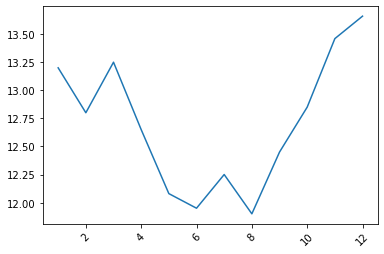

In [59]:
# Prices over the months of 2025
plt.plot(ngas_data_2025['month'], ngas_data_2025.Prices)
plt.xticks(rotation=45)
plt.show()

In [58]:
ngas_df_and_2025_data = pd.concat([n_gas_data,ngas_data_2025], ignore_index = True)
ngas_df_and_2025_data

,Dates,Prices,year,month
0,2020-10-31,10.10,2020,10
1,2020-11-30,10.30,2020,11
2,2020-12-31,11.00,2020,12
3,2021-01-31,10.90,2021,1
4,2021-02-28,10.90,2021,2
5,2021-03-31,10.90,2021,3
6,2021-04-30,10.40,2021,4
7,2021-05-31,9.84,2021,5
8,2021-06-30,10.00,2021,6
9,2021-07-31,10.10,2021,7


In [75]:
# To extract prices based on year and month
def extract_data(year,month):
    print(ngas_df_and_2025_data[(ngas_df_and_2025_data['year']==year) & (ngas_df_and_2025_data['month']==month)]['Prices'].iloc[0])

In [80]:
extract_data(2023,5)

11.2


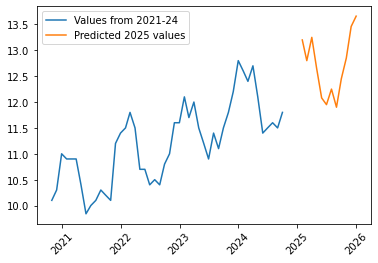

In [82]:
plt.plot(n_gas_data.Dates, n_gas_data.Prices, label ='Values from 2021-24')

plt.plot(ngas_data_2025['Dates'], ngas_data_2025.Prices, label='Predicted 2025 values')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [85]:
# The 10,11,12 months of 2024 where missing from the original dataset